# Multiclass Classifiers for Iris Species Identification

**Pierrot Van der Aa**

**January 2024**

This analysis is based on the iris dataset found on kaggle at https://www.kaggle.com/datasets/arshid/iris-flower-dataset

This script was made based on the sci-kit learn documentation and with the help of the following [MOOC about sci-kit learn](https://lms.fun-mooc.fr/courses/course-v1:inria+41026+session04/info) on the platform FUN.

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#Load the data
full_data = pd.read_csv("/home/pierrot/pCloudDrive/Mabisbis/Thesis/Multiclass/full_dataset_and_life_sample.csv", header = 0)
full_data.head()

,V1,Hs_Pop1,Hs_Pop2,Hs_Pop3,Hs_Pop4,Ht,Gst,Htmax,Gstmax,Gprimest,...,TajimaD_pop3,TajimaD_pop4,filename,dxy_Pop1_2,dxy_Pop1_3,dxy_Pop1_4,dxy_Pop2_3,dxy_Pop2_4,dxy_Pop3_4,hypothesis
0,Hypothesis00_mut8_pop4_1_1.arp.vcf,0.191,0.199,0.198,0.198,0.197,0.002,0.799,0.762,0.002,...,3.745958,3.381819,Hypothesis00_mut8_pop4_1_1.arp.vcf.gz,0.053473,0.053826,0.053767,0.042947,0.042830,0.043295,hyp00
1,Hypothesis00_mut8_pop4_10_1.arp.vcf,0.175,0.175,0.176,0.177,0.178,0.009,0.794,0.783,0.012,...,3.504708,3.200535,Hypothesis00_mut8_pop4_10_1.arp.vcf.gz,0.007122,0.006998,0.006869,0.005777,0.005666,0.005540,hyp00
2,Hypothesis00_mut8_pop4_100_1.arp.vcf,0.192,0.199,0.197,0.197,0.197,0.003,0.799,0.762,0.005,...,3.721749,3.337637,Hypothesis00_mut8_pop4_100_1.arp.vcf.gz,0.046937,0.046630,0.046116,0.037459,0.036878,0.036718,hyp00
3,Hypothesis00_mut8_pop4_1000_1.arp.vcf,0.193,0.201,0.200,0.200,0.199,0.002,0.799,0.759,0.002,...,3.747718,3.380211,Hypothesis00_mut8_pop4_1000_1.arp.vcf.gz,0.079706,0.078592,0.079174,0.064498,0.064955,0.063910,hyp00
4,Hypothesis00_mut8_pop4_10000_1.arp.vcf,0.192,0.200,0.199,0.199,0.198,0.002,0.799,0.761,0.002,...,3.747328,3.383067,Hypothesis00_mut8_pop4_10000_1.arp.vcf.gz,0.077640,0.078228,0.077330,0.064466,0.063833,0.064308,hyp00


In [3]:
#Split the data into features and target variable
data, target = full_data.drop(columns=["V1","D_mean","filename","hypothesis"]), full_data["hypothesis"]
feature_names = list(data.columns)
print(data.shape)
print(len(target))

(39446, 84)
39446


In [4]:
x = StandardScaler().fit_transform(data)

In [5]:
np.mean(x),np.std(x)

(5.91582843814239e-16, 1.0)

In [6]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_data = pd.DataFrame(x,columns=feat_cols)
normalised_data

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature74,feature75,feature76,feature77,feature78,feature79,feature80,feature81,feature82,feature83
0,-0.161582,-0.020876,-0.048414,-0.048283,-0.068714,-0.732415,-0.048665,0.125560,-0.963783,0.104510,...,-0.161343,0.136868,0.650083,0.718944,0.210687,0.223367,0.224402,0.170347,0.168168,0.190631
1,-2.426646,-3.508361,-3.261232,-3.113829,-2.768566,4.084792,-2.926711,2.752525,3.494846,2.750443,...,-0.678402,-0.478149,-6.258161,-5.427616,-1.611645,-1.617968,-1.619450,-1.635443,-1.637195,-1.643454
2,-0.020015,-0.020876,-0.194451,-0.194262,-0.068714,-0.044243,-0.048665,0.125560,0.373806,0.069231,...,0.355710,0.067934,-0.043139,-0.779088,-0.046279,-0.059613,-0.076384,-0.096247,-0.120995,-0.128858
3,0.121551,0.269748,0.243661,0.243673,0.215480,-0.732415,-0.048665,-0.249721,-0.963783,-0.142444,...,-1.414729,0.101089,0.700492,0.664408,1.242091,1.197191,1.223333,1.217307,1.242921,1.192108
4,-0.020015,0.124436,0.097623,0.097695,0.073383,-0.732415,-0.048665,0.000466,-0.963783,-0.001327,...,0.869425,0.111116,0.689329,0.761257,1.160852,1.182863,1.150819,1.215746,1.188454,1.211448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39441,-0.586281,-0.602124,-0.632563,-0.632197,-0.637104,-0.044243,-0.624274,0.625934,-0.072057,0.598417,...,-0.368449,-0.053991,-0.067244,0.041247,-0.324056,-0.335881,-0.350650,-0.331117,-0.353158,-0.363471
39442,-0.444715,-0.311500,-0.340488,-0.340240,-0.352909,-0.732415,-0.624274,0.375747,-0.517920,0.386743,...,-0.541111,0.128600,0.644362,0.539870,0.822936,0.783967,0.779888,0.821276,0.800585,0.761694
39443,-0.161582,-0.020876,-0.048414,-0.048283,-0.068714,-0.044243,-0.048665,0.125560,-0.517920,0.104510,...,-1.069909,0.088223,0.021591,0.164787,0.823242,0.839174,0.835814,0.788688,0.770767,0.792584
39444,-0.303148,-0.456812,-0.340488,-0.340240,-0.352909,-0.044243,-0.624274,0.375747,-0.072057,0.386743,...,-0.934644,-0.194428,0.005668,-0.592031,0.011513,0.026048,0.024474,-0.034579,-0.035878,-0.016989


In [7]:
pca_data = PCA(n_components=2)
principalComponents_data = pca_data.fit_transform(x)
principal_data_Df = pd.DataFrame(data = principalComponents_data, columns = ['principal component 1', 'principal component 2'])
pca_axis = pca_data.explained_variance_ratio_
print('Explained variation per principal component: {}'.format(pca_data.explained_variance_ratio_))

Explained variation per principal component: [0.518807   0.24627157]


In [8]:
pca_axis
print(principal_data_Df)

       principal component 1  principal component 2
0                  -4.846189               0.576832
1                  28.900742              11.676463
2                   1.344572               1.183657
3                  -6.224843              -0.694753
4                  -6.823408              -0.658468
...                      ...                    ...
39441              -0.023097               2.282455
39442              -4.601945               0.876262
39443              -3.172061               0.638457
39444               0.005824               2.152805
39445              77.344648              46.374870

[39446 rows x 2 columns]


<Figure size 640x480 with 0 Axes>

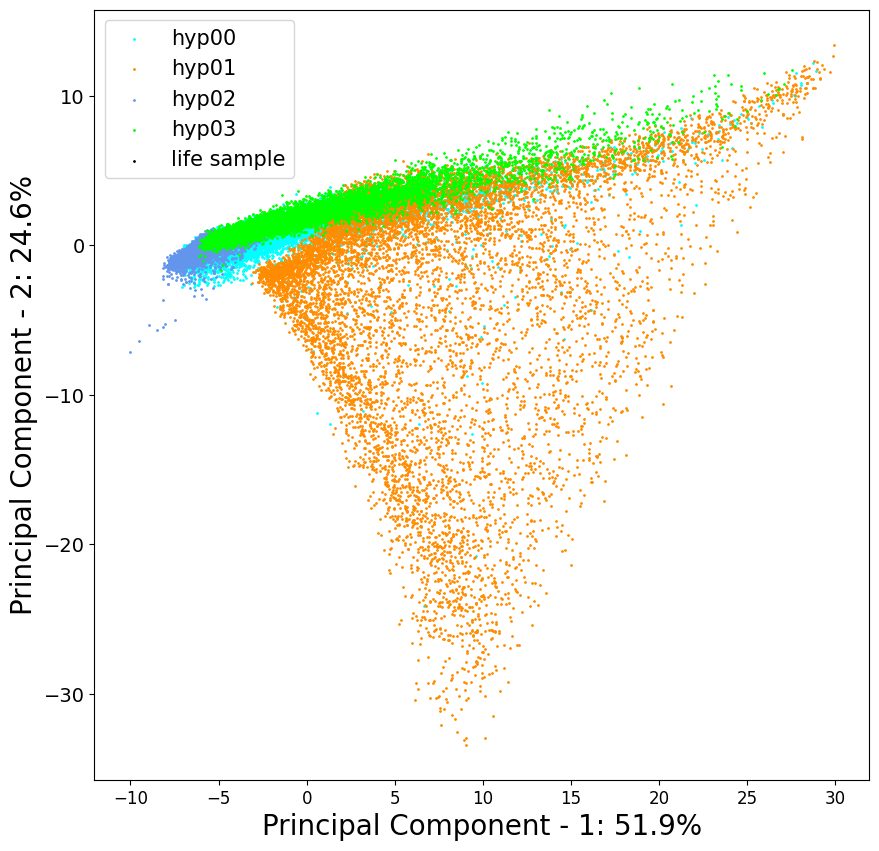

In [9]:
#Plot the PCA
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel(f'Principal Component - 1: {pca_axis[0]*100:.1f}%',fontsize=20)
plt.ylabel(f'Principal Component - 2: {pca_axis[1]*100:.1f}%',fontsize=20)
#plt.title("Principal Component Analysis",fontsize=20)
targets = ['hyp00', 'hyp01', 'hyp02', 'hyp03', 'life sample']
colors = ['aqua', 'darkorange', 'cornflowerblue', 'lime', 'black']
for target_here, color in zip(targets,colors):
    indicesToKeep = target == target_here
    plt.scatter(principal_data_Df.loc[indicesToKeep, 'principal component 1']
               , principal_data_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 1)

plt.legend(targets,prop={'size': 15})


<Figure size 640x480 with 0 Axes>

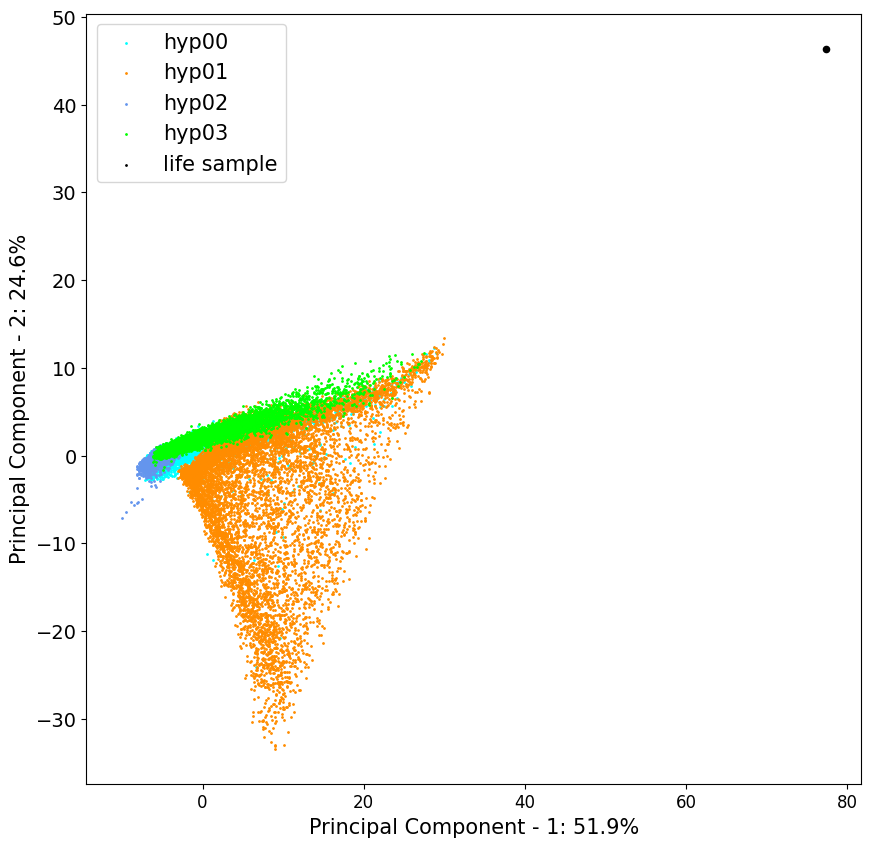

In [11]:
#Look for the dark point
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel(f'Principal Component - 1: {pca_axis[0]*100:.1f}%',fontsize=15)
plt.ylabel(f'Principal Component - 2: {pca_axis[1]*100:.1f}%',fontsize=15)
#plt.title("Principal Component Analysis",fontsize=20)
targets = ['hyp00', 'hyp01', 'hyp02', 'hyp03', 'life sample']
colors = ['aqua', 'darkorange', 'cornflowerblue', 'lime', 'black']
for target_here, color in zip(targets,colors):
    indicesToKeep = target == target_here
    plt.scatter(principal_data_Df.loc[indicesToKeep, 'principal component 1']
               , principal_data_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 1)
plt.scatter(principal_data_Df.loc[39445, 'principal component 1']
               , principal_data_Df.loc[39445, 'principal component 2'], c = color, s = 20)
#plt.scatter(principal_data_Df.loc['principal component 2'][39445], principal_data_Df.loc['principal component 1'][39445], color='black')

plt.legend(targets,prop={'size': 15})

In [11]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(x)
tsne.kl_divergence_

1.8719271421432495

<Figure size 640x480 with 0 Axes>

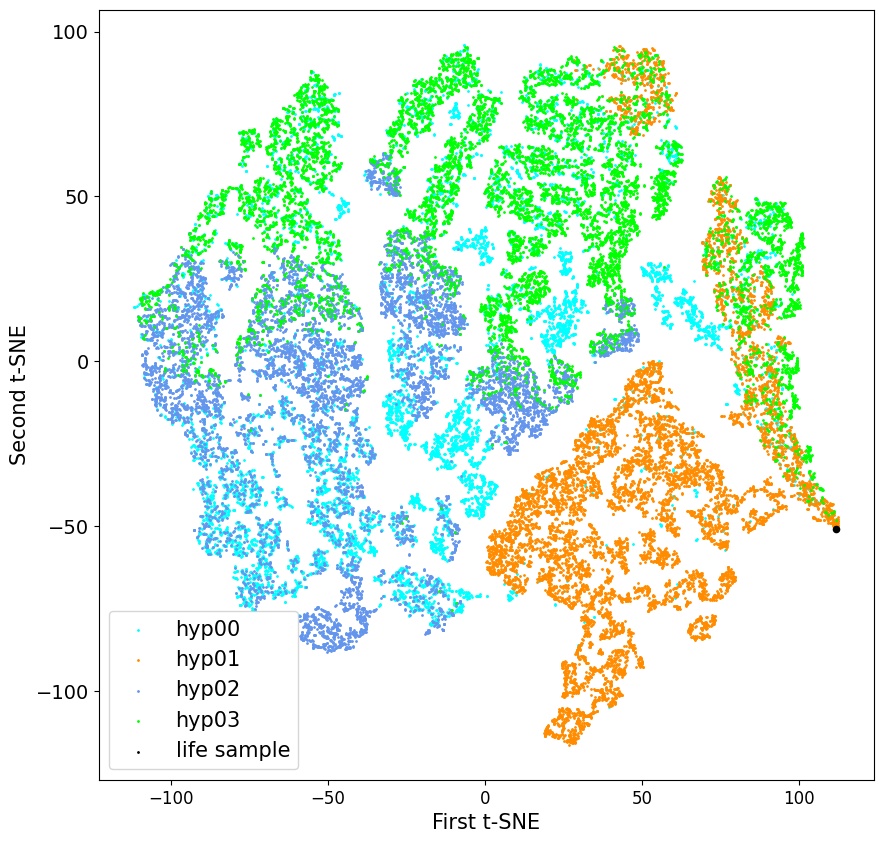

In [21]:
#Look for the dark point
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('First t-SNE',fontsize=15)
plt.ylabel('Second t-SNE',fontsize=15)
#plt.title("Principal Component Analysis",fontsize=20)
targets = ['hyp00', 'hyp01', 'hyp02', 'hyp03', 'life sample']
colors = ['aqua', 'darkorange', 'cornflowerblue', 'lime', 'black']
for target_here, color in zip(targets,colors):
    indicesToKeep = target == target_here
    plt.scatter(X_tsne[indicesToKeep, 0]
               , X_tsne[indicesToKeep, 1], c = color, s = 1)
plt.scatter(X_tsne[39445, 0]
               , X_tsne[39445, 1], c = 'black', s = 20)

plt.legend(targets,prop={'size': 15})